# AI4Code Pytorch DistilBert Baseline

I used a lot of code from Kaggle's starter notebook here: https://www.kaggle.com/code/ryanholbrook/getting-started-with-ai4code

I replaced their model with a DistilBert model.

In [1]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
from scipy import sparse
from tqdm import tqdm

pd.options.display.width = 180
pd.options.display.max_colwidth = 120

BERT_PATH = "../input/huggingface-bert-variants/distilbert-base-uncased/distilbert-base-uncased"

data_dir = Path('../input/AI4Code')

In [2]:
NUM_TRAIN = 10000


def read_notebook(path):
    return (
        pd.read_json(
            path,
            dtype={'cell_type': 'category', 'source': 'str'})
        .assign(id=path.stem)
        .rename_axis('cell_id')
    )


paths_train = list((data_dir / 'train').glob('*.json'))[:NUM_TRAIN]
notebooks_train = [
    read_notebook(path) for path in tqdm(paths_train, desc='Train NBs')
]
df = (
    pd.concat(notebooks_train)
    .set_index('id', append=True)
    .swaplevel()
    .sort_index(level='id', sort_remaining=False)
)

df

Train NBs: 100%|██████████| 10000/10000 [01:44<00:00, 95.41it/s]


cell_type                                                                                                                   source
id             cell_id                                                                                                                                    
000c0a9b2fef4d 1087237d      code  # Data manipulation\nimport pandas as pd\nimport numpy as np\n\n# Data visualization\nimport matplotlib.pyplot as pl...
               d7209f1f      code                                                                      fifa_raw_dataset = pd.read_csv('../input/data.csv')
               daf5b8ee      code                                                                                                  fifa_raw_dataset.head()
               e404213c      code                                                                                                  fifa_raw_dataset.info()
               2bad59b0      code                                                                                                   fifa_raw_dataset.shape
...                           ...                                                                                                                      ...
fffc63ff750064 56aa8da7      code                                                                 \nsubmission.to_csv('house_price_rf.csv', index = False)
               411b85d9  markdown                                                                                                    1. # Data exploration
               e7e67119  markdown                                                                                                   # # Data preprocessing
               8b54cf58  markdown                                                                                            # Post-process for submission
               b3c6bc16  markdown                                                                                                   # Define and fit model

[461166 rows x 2 columns]

In [3]:
# Get an example notebook
nb_id = df.index.unique('id')[6]
print('Notebook:', nb_id)

print("The disordered notebook:")
nb = df.loc[nb_id, :]
display(nb)
print()

Notebook: 00290ddf866418
The disordered notebook:


,cell_type,source
cell_id,,
4e6f32f6,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...
0aeca210,code,"import warnings\nimport random\n\nSEED=44\nrandom.seed(SEED)\nnp.random.seed(SEED)\npd.set_option('display.width', N..."
cadfdb16,code,train = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/train.csv')\ntest = pd.read_csv('/kaggle/input...
fe39c117,code,train.info()
bbc5f229,code,"y = train.iloc[:,-1]\nX = train.iloc[:,:-1]\nZ = test"
46cc92d1,code,def get_obj_cols(df):\n return [col for col in df.columns if df.dtypes[col] == np.object]
9d6ea72b,code,X_objs = get_obj_cols(X)\nX_objs_idx = [X.columns.get_loc(col) for col in X_objs]\nZ_objs = get_obj_cols(Z)\nZ_objs_...
d0f88604,code,for obj in X_objs:\n X[obj] = X[obj].astype('category').cat.codes\nfor obj in Z_objs:\n Z[obj] = Z[obj].astype...
8df28832,code,"X.drop('id', axis=1, inplace=True)\nZ.drop('id', axis=1, inplace=True)"


In [4]:
df_orders = pd.read_csv(
    data_dir / 'train_orders.csv',
    index_col='id',
    squeeze=True,
).str.split()  # Split the string representation of cell_ids into a list

df_orders

id
00001756c60be8    [1862f0a6, 448eb224, 2a9e43d6, 7e2f170a, 038b763d, 77e56113, 2eefe0ef, 1ae087ab, 0beab1cd, 8ffe0b25, 9a78ab76, 0d136...
00015c83e2717b    [2e94bd7a, 3e99dee9, b5e286ea, da4f7550, c417225b, 51e3cd89, 2600b4eb, 75b65993, cf195f8b, 25699d02, 72b3201a, f2c75...
0001bdd4021779    [3fdc37be, 073782ca, 8ea7263c, 80543cd8, 38310c80, 073e27e5, 015d52a4, ad7679ef, 7fde4f04, 07c52510, 0a1a7a39, 0bcd3...
0001daf4c2c76d    [97266564, a898e555, 86605076, 76cc2642, ef279279, df6c939f, 2476da96, 00f87d0a, ae93e8e6, 58aadb1d, d20b0094, 986fd...
0002115f48f982                                 [9ec225f0, 18281c6c, e3b6b115, 4a044c54, 365fe576, a3188e54, b3f6e12d, ee7655ca, 84125b7a]
                                                                           ...                                                           
fffc30d5a0bc46    [09727c0c, ff1ea6a0, ddfef603, a01ce9b3, 3ba953ee, bf92a015, f4a0492a, 095812e6, 53125cfe, aa32a700, 63340e73, 06d8c...
fffc3b44869198    [978a5137, fa

In [5]:
len(df_orders.loc["002ba502bdac45"])

73

In [6]:
cell_order = df_orders.loc[nb_id]

print("The ordered notebook:")
nb.loc[cell_order, :]

The ordered notebook:


,cell_type,source
cell_id,,
91d97bb2,markdown,# Read Data
4e6f32f6,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...
0aeca210,code,"import warnings\nimport random\n\nSEED=44\nrandom.seed(SEED)\nnp.random.seed(SEED)\npd.set_option('display.width', N..."
cadfdb16,code,train = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/train.csv')\ntest = pd.read_csv('/kaggle/input...
fe39c117,code,train.info()
bbc5f229,code,"y = train.iloc[:,-1]\nX = train.iloc[:,:-1]\nZ = test"
91194a54,markdown,# Categorical
46cc92d1,code,def get_obj_cols(df):\n return [col for col in df.columns if df.dtypes[col] == np.object]
9d6ea72b,code,X_objs = get_obj_cols(X)\nX_objs_idx = [X.columns.get_loc(col) for col in X_objs]\nZ_objs = get_obj_cols(Z)\nZ_objs_...


In [7]:
def get_ranks(base, derived):
    return [base.index(d) for d in derived]

cell_ranks = get_ranks(cell_order, list(nb.index))
nb.insert(0, 'rank', cell_ranks)

nb

,rank,cell_type,source
cell_id,,,
4e6f32f6,1,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...
0aeca210,2,code,"import warnings\nimport random\n\nSEED=44\nrandom.seed(SEED)\nnp.random.seed(SEED)\npd.set_option('display.width', N..."
cadfdb16,3,code,train = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/train.csv')\ntest = pd.read_csv('/kaggle/input...
fe39c117,4,code,train.info()
bbc5f229,5,code,"y = train.iloc[:,-1]\nX = train.iloc[:,:-1]\nZ = test"
46cc92d1,7,code,def get_obj_cols(df):\n return [col for col in df.columns if df.dtypes[col] == np.object]
9d6ea72b,8,code,X_objs = get_obj_cols(X)\nX_objs_idx = [X.columns.get_loc(col) for col in X_objs]\nZ_objs = get_obj_cols(Z)\nZ_objs_...
d0f88604,9,code,for obj in X_objs:\n X[obj] = X[obj].astype('category').cat.codes\nfor obj in Z_objs:\n Z[obj] = Z[obj].astype...
8df28832,10,code,"X.drop('id', axis=1, inplace=True)\nZ.drop('id', axis=1, inplace=True)"


In [8]:
df_orders_ = df_orders.to_frame().join(
    df.reset_index('cell_id').groupby('id')['cell_id'].apply(list),
    how='right',
)

ranks = {}
for id_, cell_order, cell_id in df_orders_.itertuples():
    ranks[id_] = {'cell_id': cell_id, 'rank': get_ranks(cell_order, cell_id)}

df_ranks = (
    pd.DataFrame
    .from_dict(ranks, orient='index')
    .rename_axis('id')
    .apply(pd.Series.explode)
    .set_index('cell_id', append=True)
)

df_ranks

rank
id             cell_id      
000c0a9b2fef4d 1087237d    2
               d7209f1f    4
               daf5b8ee    6
               e404213c    7
               2bad59b0    8
...                      ...
fffc63ff750064 56aa8da7   25
               411b85d9    1
               e7e67119    6
               8b54cf58   22
               b3c6bc16   18

[461166 rows x 1 columns]

In [9]:
df_ancestors = pd.read_csv(data_dir / 'train_ancestors.csv', index_col='id')
df_ancestors

,ancestor_id,parent_id
id,,
00001756c60be8,945aea18,NaN
00015c83e2717b,aa2da37e,317b65d12af9df
0001bdd4021779,a7711fde,NaN
0001daf4c2c76d,090152ca,NaN
0002115f48f982,272b483a,NaN
...,...,...
fffc30d5a0bc46,6aed207b,NaN
fffc3b44869198,a6aaa8d7,NaN
fffc63ff750064,0a1b5b65,NaN


In [10]:
df = df.reset_index().merge(df_ranks, on=["id", "cell_id"]).merge(df_ancestors, on=["id"])
df

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id
0,000c0a9b2fef4d,1087237d,code,# Data manipulation\nimport pandas as pd\nimport numpy as np\n\n# Data visualization\nimport matplotlib.pyplot as pl...,2,a2e47ece,NaN
1,000c0a9b2fef4d,d7209f1f,code,fifa_raw_dataset = pd.read_csv('../input/data.csv'),4,a2e47ece,NaN
2,000c0a9b2fef4d,daf5b8ee,code,fifa_raw_dataset.head(),6,a2e47ece,NaN
3,000c0a9b2fef4d,e404213c,code,fifa_raw_dataset.info(),7,a2e47ece,NaN
4,000c0a9b2fef4d,2bad59b0,code,fifa_raw_dataset.shape,8,a2e47ece,NaN
...,...,...,...,...,...,...,...
461161,fffc63ff750064,56aa8da7,code,"\nsubmission.to_csv('house_price_rf.csv', index = False)",25,0a1b5b65,NaN
461162,fffc63ff750064,411b85d9,markdown,1. # Data exploration,1,0a1b5b65,NaN
461163,fffc63ff750064,e7e67119,markdown,# # Data preprocessing,6,0a1b5b65,NaN
461164,fffc63ff750064,8b54cf58,markdown,# Post-process for submission,22,0a1b5b65,NaN


<AxesSubplot:>

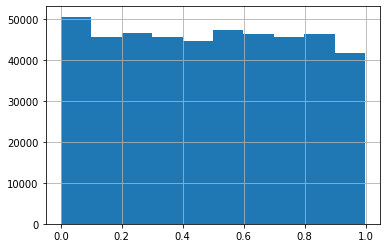

In [11]:
df["pct_rank"] = df["rank"] / df.groupby("id")["cell_id"].transform("count")

df["pct_rank"].hist(bins=10)

In [12]:
from sklearn.model_selection import GroupShuffleSplit

NVALID = 0.1  # size of validation set

splitter = GroupShuffleSplit(n_splits=1, test_size=NVALID, random_state=0)

train_ind, val_ind = next(splitter.split(df, groups=df["ancestor_id"]))

train_df = df.loc[train_ind].reset_index(drop=True)
val_df = df.loc[val_ind].reset_index(drop=True)

In [13]:
val_df.head()

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank
0,0019c0de64fe80,76b81a6e,code,"import warnings\nwarnings.filterwarnings('ignore', category=DeprecationWarning)\nwarnings.filterwarnings('ignore', c...",0,47566b8b,8e848ffeededab,0.0
1,0019c0de64fe80,c06f3027,code,# reading csv files and train & test file paths\ntrain_df = pd.read_csv('../input/coleridgeinitiative-show-us-the-da...,2,47566b8b,8e848ffeededab,0.111111
2,0019c0de64fe80,2e8ddcdc,code,train_df.head(6),3,47566b8b,8e848ffeededab,0.166667
3,0019c0de64fe80,0bdb7484,code,train_df.info(),4,47566b8b,8e848ffeededab,0.222222
4,0019c0de64fe80,4470e13e,code,"[print(f""{col}:{len(train_df[col].unique())}"") for col in train_df.columns] #finding unique values in each column",5,47566b8b,8e848ffeededab,0.277778


In [14]:
from bisect import bisect


def count_inversions(a):
    inversions = 0
    sorted_so_far = []
    for i, u in enumerate(a):
        j = bisect(sorted_so_far, u)
        inversions += i - j
        sorted_so_far.insert(j, u)
    return inversions


def kendall_tau(ground_truth, predictions):
    total_inversions = 0
    total_2max = 0  # twice the maximum possible inversions across all instances
    for gt, pred in zip(ground_truth, predictions):
        ranks = [gt.index(x) for x in pred]  # rank predicted order in terms of ground truth
        total_inversions += count_inversions(ranks)
        n = len(gt)
        total_2max += n * (n - 1)
    return 1 - 4 * total_inversions / total_2max

In [15]:
y_dummy = val_df.groupby('id')['cell_id'].apply(list)
kendall_tau(df_orders.loc[y_dummy.index], y_dummy)

0.42511216883092573

In [16]:
val_df["cell_type"].value_counts()

code        29855
markdown    14725
Name: cell_type, dtype: int64

In [17]:
train_df_mark = train_df[train_df["cell_type"] == "markdown"].reset_index(drop=True)

val_df_mark = val_df[val_df["cell_type"] == "markdown"].reset_index(drop=True)

In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(val_df_mark["pct_rank"], np.ones(val_df_mark.shape[0])*train_df_mark["pct_rank"].mean())

0.08783961929350827

In [19]:
from tqdm import tqdm
import sys, os
from transformers import DistilBertModel, DistilBertTokenizer
import torch.nn.functional as F
import torch.nn as nn
import torch

MAX_LEN = 128

class MarkdownModel(nn.Module):
    def __init__(self):
        super(MarkdownModel, self).__init__()
        self.distill_bert = DistilBertModel.from_pretrained(BERT_PATH)
        self.top = nn.Linear(768, 1)
        
    def forward(self, ids, mask):
        x = self.distill_bert(ids, mask)[0]
        x = self.top(x[:, 0, :])
        return x

In [20]:
from torch.utils.data import DataLoader, Dataset



class MarkdownDataset(Dataset):
    
    def __init__(self, df, max_len):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.max_len = max_len
        self.tokenizer = DistilBertTokenizer.from_pretrained(BERT_PATH, do_lower_case=True)

    def __getitem__(self, index):
        row = self.df.iloc[index]
        
        inputs = self.tokenizer.encode_plus(
            row.source,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding="max_length",
            return_token_type_ids=True,
            truncation=True
        )
        ids = torch.LongTensor(inputs['input_ids'])
        mask = torch.LongTensor(inputs['attention_mask'])

        return ids, mask, torch.FloatTensor([row.pct_rank])

    def __len__(self):
        return self.df.shape[0]
    
train_ds = MarkdownDataset(train_df_mark, max_len=MAX_LEN)
val_ds = MarkdownDataset(val_df_mark, max_len=MAX_LEN)

val_ds[0]

(tensor([  101,  2057,  2024,  3024,  2007,  1018,  2364,  4109,  1997,  2951,
          1024,  1008,  1036,  3345,  1012, 20116,  2615,  1024,  1036,  1996,
         20116,  2615,  5371,  4820,  2035,  1996, 27425,  1997,  1996,  5523,
          1010,  2107,  2004,  2037,  2516,  1998,  1996,  2951, 13462,  2027,
         16462,  1012,  1008,  1036,  3345,  1024,  1036,  1996, 14176,  4820,
          1996,  5025,  5523,  2008,  2024, 14964,  1999,  3345,  1012, 20116,
          6371,  1046,  3385,  4289,  1012,  1008,  1036,  3231,  1024,  1036,
          1996, 14176,  4820,  1996,  5025,  5523,  2008,  2097,  2022,  2109,
          2005,  5604,  5682,  1006,  2947,  1010,  2007,  2053,  2598,  3606,
         20116,  2615,  5371,  2800,  1007,  1012,  1008,  1036,  7099,  1035,
         12339,  1012, 20116,  2615,  1024,  1036,  1996, 20116,  2615,  5371,
          4820,  2035,  1996,  5523,  8909,  2015,  1999,  1996,  3231,  2275,
          1010,  2005,  2029,  2057,  1005,  2222,  

In [21]:
val_df_mark.iloc[0]

id                                                                                                                      0019c0de64fe80
cell_id                                                                                                                       6a2f9600
cell_type                                                                                                                     markdown
source         We are provided with 4 main pieces of data:\n\n* `train.csv:` The CSV file containing all the metadata of the public...
rank                                                                                                                                 1
ancestor_id                                                                                                                   47566b8b
parent_id                                                                                                               8e848ffeededab
pct_rank                                               

In [22]:
def adjust_lr(optimizer, epoch):
    if epoch < 1:
        lr = 5e-5
    elif epoch < 2:
        lr = 1e-3
    elif epoch < 5:
        lr = 1e-4
    else:
        lr = 1e-5

    for p in optimizer.param_groups:
        p['lr'] = lr
    return lr
    
def get_optimizer(net):
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=3e-4, betas=(0.9, 0.999),
                                 eps=1e-08)
    return optimizer

In [23]:
BS = 32
NW = 8

train_loader = DataLoader(train_ds, batch_size=BS, shuffle=True, num_workers=NW,
                          pin_memory=False, drop_last=True)
val_loader = DataLoader(val_ds, batch_size=BS, shuffle=False, num_workers=NW,
                          pin_memory=False, drop_last=False)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [24]:
def read_data(data):
    return tuple(d.cuda() for d in data[:-1]), data[-1].cuda()


def validate(model, val_loader):
    model.eval()
    
    tbar = tqdm(val_loader, file=sys.stdout)
    
    preds = []
    labels = []

    with torch.no_grad():
        for idx, data in enumerate(tbar):
            inputs, target = read_data(data)

            pred = model(inputs[0], inputs[1])

            preds.append(pred.detach().cpu().numpy().ravel())
            labels.append(target.detach().cpu().numpy().ravel())
    
    return np.concatenate(labels), np.concatenate(preds)

def train(model, train_loader, val_loader, epochs):
    np.random.seed(0)
    
    optimizer = get_optimizer(model)

    criterion = torch.nn.MSELoss()
    
    for e in range(epochs):   
        model.train()
        tbar = tqdm(train_loader, file=sys.stdout)
        
        lr = adjust_lr(optimizer, e)
        
        loss_list = []
        preds = []
        labels = []

        for idx, data in enumerate(tbar):
            inputs, target = read_data(data)

            optimizer.zero_grad()
            pred = model(inputs[0], inputs[1])

            loss = criterion(pred, target)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.detach().cpu().item())
            preds.append(pred.detach().cpu().numpy().ravel())
            labels.append(target.detach().cpu().numpy().ravel())
            
            avg_loss = np.round(np.mean(loss_list), 4)

            tbar.set_description(f"Epoch {e+1} Loss: {avg_loss} lr: {lr}")
            
        y_val, y_pred = validate(model, val_loader)
            
        print("Validation MSE:", np.round(mean_squared_error(y_val, y_pred), 4))
        print()
    return model, y_pred

model = MarkdownModel()
model = model.cuda()
model, y_pred = train(model, train_loader, val_loader, epochs=1)

Some weights of the model checkpoint at ../input/huggingface-bert-variants/distilbert-base-uncased/distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


100%|██████████| 461/461 [00:43<00:00, 10.49it/s]
Validation MSE: 0.0526



In [25]:
val_df["pred"] = val_df.groupby(["id", "cell_type"])["rank"].rank(pct=True)
val_df.loc[val_df["cell_type"] == "markdown", "pred"] = y_pred

In [26]:
y_dummy = val_df.sort_values("pred").groupby('id')['cell_id'].apply(list)
kendall_tau(df_orders.loc[y_dummy.index], y_dummy)

0.7716774683333303

In [27]:
paths_test = list((data_dir / 'test').glob('*.json'))
notebooks_test = [
    read_notebook(path) for path in tqdm(paths_test, desc='Test NBs')
]
test_df = (
    pd.concat(notebooks_test)
    .set_index('id', append=True)
    .swaplevel()
    .sort_index(level='id', sort_remaining=False)
).reset_index()

Test NBs: 100%|██████████| 4/4 [00:00<00:00, 84.00it/s]


In [28]:
test_df["rank"] = test_df.groupby(["id", "cell_type"]).cumcount()
test_df["pred"] = test_df.groupby(["id", "cell_type"])["rank"].rank(pct=True)

In [29]:
test_df["pct_rank"] = 0
test_ds = MarkdownDataset(test_df[test_df["cell_type"] == "markdown"].reset_index(drop=True), max_len=MAX_LEN)
test_loader = DataLoader(test_ds, batch_size=BS, shuffle=False, num_workers=NW,
                          pin_memory=False, drop_last=False)

len(test_ds), test_ds[0]

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(43,
 (tensor([  101,  1001, 25169,  2951,   100,  2292,  1005,  1055,  4094,  1996,
           2951,  2061,  7473,  2050,  2064,  2022,  4162,   102,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     

In [30]:
_, y_test = validate(model, test_loader)

100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


In [31]:
test_df.loc[test_df["cell_type"] == "markdown", "pred"] = y_test

In [32]:
sub_df = test_df.sort_values("pred").groupby("id")["cell_id"].apply(lambda x: " ".join(x)).reset_index()
sub_df.rename(columns={"cell_id": "cell_order"}, inplace=True)
sub_df.head()

,id,cell_order
0,0009d135ece78d,0a226b6a 8cb8d28a ddfd239c c6cd22db e25aa9bd 1372ae9b f9893819 90ed07ab ba55e576 39e937ec 7f388a41 2843a25a 06dbf8cf
1,0010483c12ba9b,54c7cab3 fe66203e 7844d5f8 7f270e34 5ce8863c 4a0777c4 4703bb6d 4a32c095 865ad516 02a0be6d
2,0010a919d60e4f,23607d04 aafc3d23 b7578789 80e077ec b190ebb4 bbff12d4 ed415c3c 322850af c069ed33 584f6568 8ce62db4 868c4eae d3f5c397...
3,0028856e09c5b7,eb293dfc 012c9d02 d22526d1 3ae7ece3


In [33]:
sub_df.to_csv("submission.csv", index=False)